<a href="https://colab.research.google.com/github/epastor8020/Analitica_de_Datos_Abandono_Empleados/blob/main/Analisis_Abandono_Empleados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importamos las librerias a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargamos los datos
df= pd.read_csv(fr'/content/drive/MyDrive/Analitica_Empleados_UDEA/AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quince#N/D,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_ma#N/Dger_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       1470 non-null   int64  
 1   abandono                   1470 non-null   object 
 2   viajes                     1470 non-null   object 
 3   departamento               1470 non-null   object 
 4   distancia_casa             1470 non-null   int64  
 5   educacion                  1369 non-null   object 
 6   carrera                    1470 non-null   object 
 7   empleados                  1470 non-null   int64  
 8   satisfaccion_entorno       1470 non-null   object 
 9   sexo                       1271 non-null   float64
 10  implicacion                1452 non-null   object 
 11  nivel_laboral              1470 non-null   int64  
 12  puesto                     1470 non-null   object 
 13  satisfaccion_trabajo       1394 non-null   object 
 1

In [ ]:
#Analisis de valores nulos - Buscando celdas vacias
df.isna().sum().sort_values(ascending = False)

,0
anos_en_puesto,1238
conciliacion,1011
sexo,199
educacion,101
satisfaccion_trabajo,76
implicacion,18
edad,0
nivel_acciones,0
evaluacion,0
satisfaccion_companeros,0


In [ ]:
#los campos años_en_puesto y conciliacion tienen demasiados nulos --> seran eliminados
df.drop(columns = ['anos_en_puesto', 'conciliacion'], axis=1, inplace=True)

In [ ]:
#Sexo, Educacion, Satisfaccion_Trabajo e Implicacion --> EDA
#EDA Variabless Categoricas
def graficos_eda_categorias(cat):
  #Calculamos el numero de filas que necesitamos
  from math import ceil
  filas= ceil(cat.shape[1]/2)

  #Definimos el grafico
  f, ax= plt.subplots(nrows=filas,ncols=2, figsize=(16,filas*16))

  #Aplanamos el grafico
  ax= ax.flat

  #Creamos un ciclo para visualizar cada variable
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax=ax[cada])
    ax[cada].set_title(variable, fontsize=12, fontweight='bold')
    ax[cada].tick_params(labelsize=12)



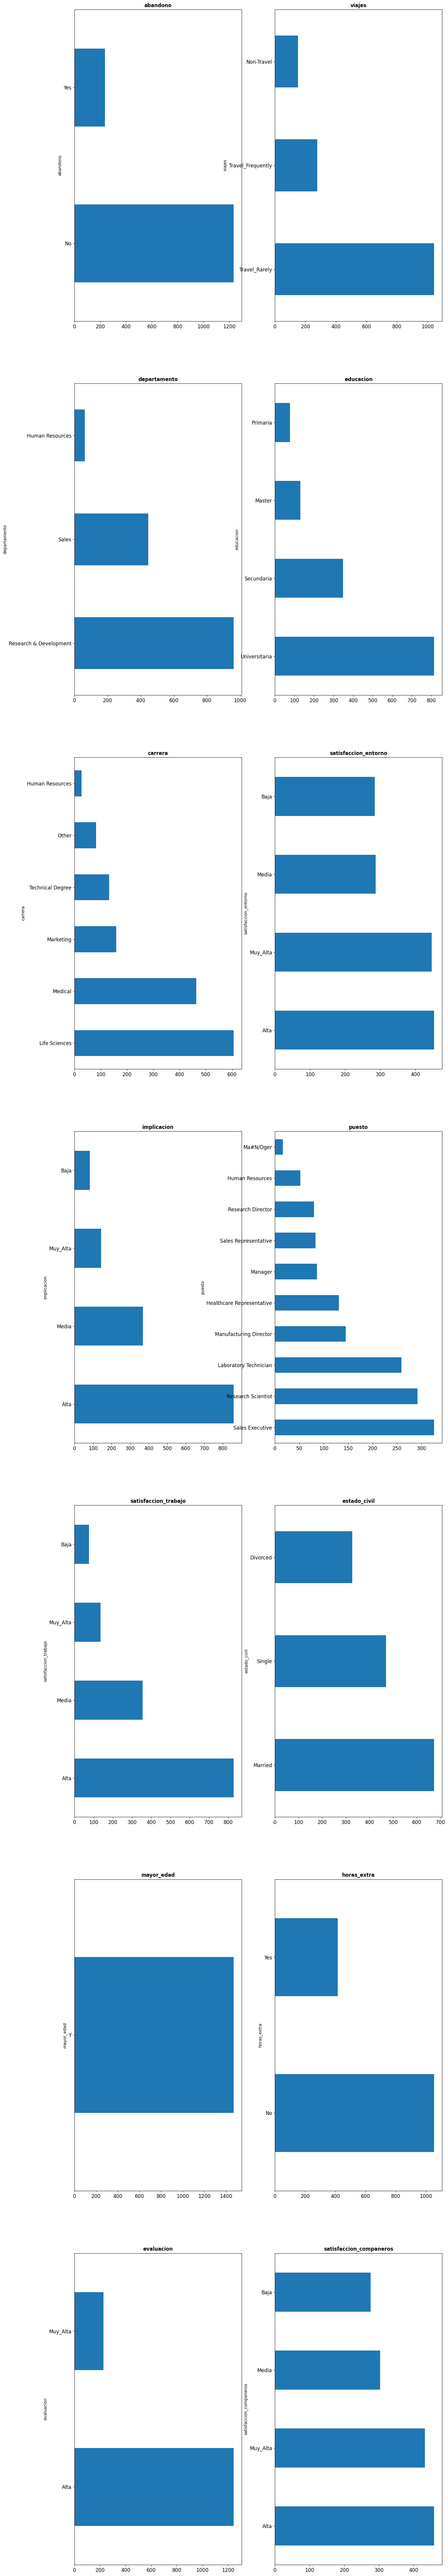

In [ ]:
#Generamos las graficas de la funcion para visualizar las variables categoricas
graficos_eda_categorias(df.select_dtypes('O'))

In [ ]:
#Eliminamos la Variable Mauyor de edad ya que no aporta informacion reñevante debido a que todos los empleados son mayores de edad
df.drop(columns='mayor_edad', axis=1, inplace=True)

In [ ]:
#Imputamos los datos vacios de las variables educacion, satisfaccion_trabajo e implicacion con el valor que mas se repite en cada variable
#Educacion:Imputamos por 'Universitario'
#Satisfaccion_Trabajo: Imputamos por' Alta'
#Implicacion: Imputamos por el valor 'Alta'

df['educacion'] = df['educacion'].fillna('Universitario')
df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')
df['implicacion'] = df['implicacion'].fillna('Alta')

In [ ]:
#EDA con VAriables Numericas
def estadisticos_cont(num):
  #Calculamos describe en las columnas
  estadisticos = num.describe().T

  #añadimos la mediana,
  estadisticos['median'] = num.median()

  #Reordenamos la mediana al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]

 #Devolvemos la funcion
  return(estadisticos)

In [ ]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quince#N/D,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:


*   Empleados solo tiene un valor
*   Sexo tiene 4 valores
*   Horas quincena solo tiene  un valor

In [ ]:
#Eliminamos las columnas Empleados, sexo y horas quincena
df.drop(columns=['empleados', 'sexo', 'horas_quince#N/D'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       1470 non-null   int64 
 1   abandono                   1470 non-null   object
 2   viajes                     1470 non-null   object
 3   departamento               1470 non-null   object
 4   distancia_casa             1470 non-null   int64 
 5   educacion                  1470 non-null   object
 6   carrera                    1470 non-null   object
 7   satisfaccion_entorno       1470 non-null   object
 8   implicacion                1470 non-null   object
 9   nivel_laboral              1470 non-null   int64 
 10  puesto                     1470 non-null   object
 11  satisfaccion_trabajo       1470 non-null   object
 12  estado_civil               1470 non-null   object
 13  salario_mes                1470 non-null   int64 
 14  num_empresas_

In [ ]:
#Renombro la columna anos_con_ma#N/Dger_actual
df.rename(columns={'anos_con_ma#N/Dger_actual':'anos_con_manager_actual'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

##Generacion de Insights

In [ ]:
#Cual es la tasa de abandono
df.abandono.value_counts(normalize=True) * 100

,proportion
abandono,
No,83.877551
Yes,16.122449


In [ ]:
#HAy algun tipo de empleado que deja la empresa
#Transformamos la variable abandono a valores numericos
df['abandono']= df.abandono.map({'No':0, 'Yes':1})

<Axes: xlabel='educacion'>

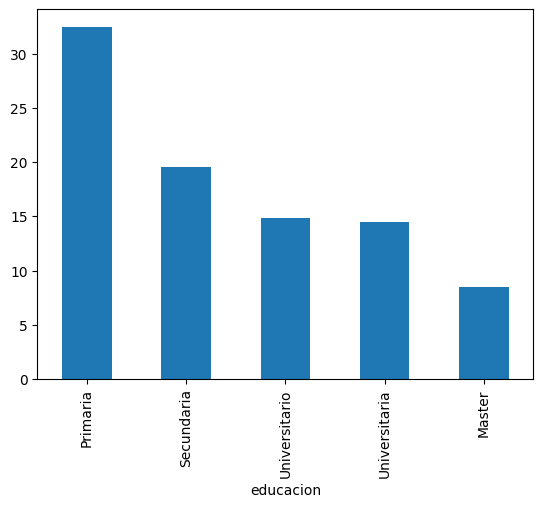

In [ ]:
#Hacemos analisis por educacion
temp= df.groupby('educacion').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='estado_civil'>

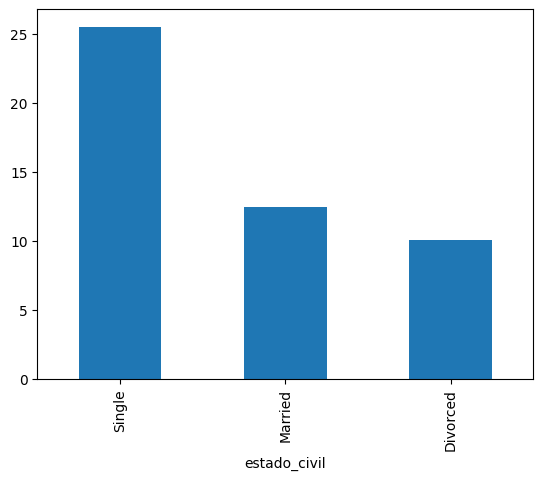

In [ ]:
#Analisis por estado civil
temp=df.groupby('estado_civil').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='horas_extra'>

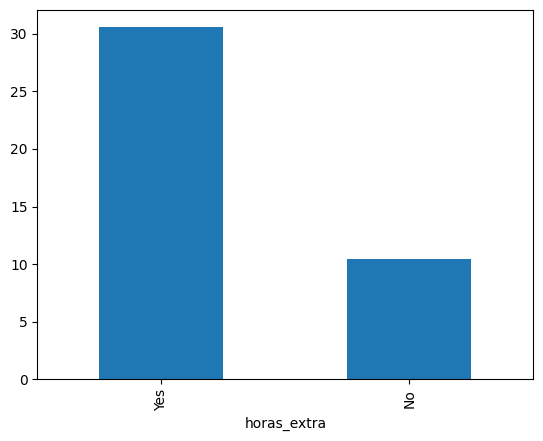

In [ ]:
#Analisis por horas extras
temp=df.groupby('horas_extra').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='puesto'>

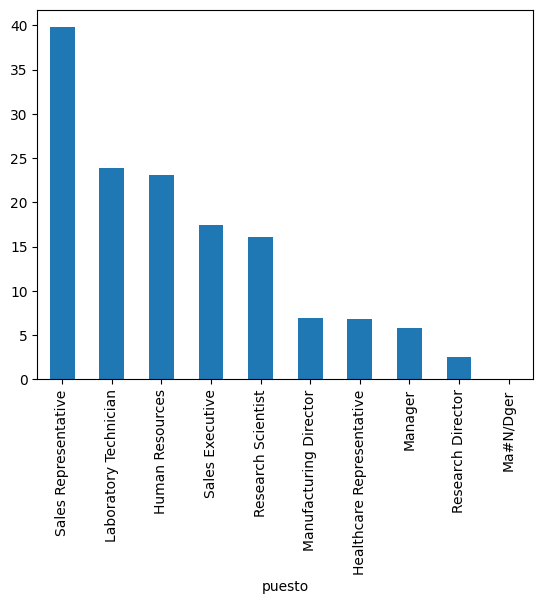

In [ ]:
#Analizamos por el puesto de trabajo
temp=df.groupby('puesto').abandono.mean().sort_values(ascending=False)*100
temp.plot.bar()

<Axes: xlabel='abandono'>

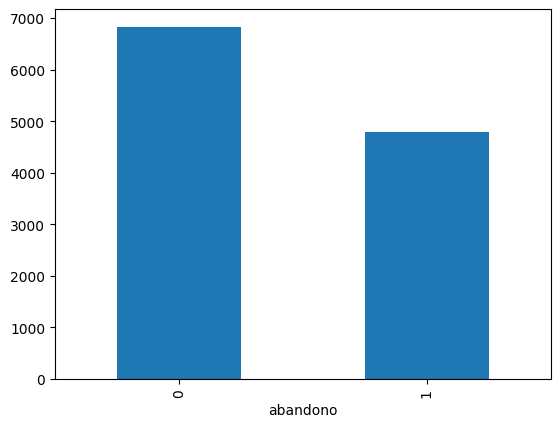

In [ ]:
#Analizamos el abandono por el salario
temp=df.groupby('abandono').salario_mes.mean()
temp.plot.bar()
#

In [ ]:
#Creamos una nueva variable llamada salario_ano
# Opcional : df['salario_ano']=df.salario_mes*12
df['salario_ano']=df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [ ]:
#Calculamos el impacto economico de cada empleado si deja la empresa
condiciones = [(df['salario_ano']<30000),
              (df['salario_ano']>=30000) & (df['salario_ano']<50000),
              (df['salario_ano']>=50000) & (df['salario_ano']<75000),
              (df['salario_ano']>=75000)]

resultados = [df.salario_ano * 0.161,df.salario_ano * 0.197, df.salario_ano *0.204, df.salario_ano * 0.21]

#Aplicamos las condiciones
df['impacto_abandono'] = np.select(condiciones, resultados, default=000)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


In [ ]:
#Cuanto nos ha costado el problema del ultimo año
costo_total=df.loc[df.abandono ==1].impacto_abandono.sum()
print(fr'EL impacto que ha tenido la empresa el ultimo año es:{costo_total}')


EL impacto que ha tenido la empresa el ultimo año es:2719005.912


In [ ]:
#Cuanto nos puede costar un empleado que no esta motivado (implicacion = baja)
df.loc[(df.abandono ==1) & (df.implicacion=='Baja')].impacto_abandono.sum()



368672.688

In [ ]:
#Cuanto nos costaria realizar actividades para mitigar el impacto economico
print(f'Reducir un 10% de la fuga de empleados nos ahorraria a la empresa ${int(costo_total)* 0.1} cada año')
print(f'Reducir un 20% de la fuga de empleados nos ahorraria a la empresa ${int(costo_total)* 0.2} cada año')
print(f'Reducir un 30% de la fuga de empleados nos ahorraria a la empresa ${int(costo_total)* 0.3} cada año')

Reducir un 10% de la fuga de empleados nos ahorraria a la empresa $271900.5 cada año
Reducir un 20% de la fuga de empleados nos ahorraria a la empresa $543801.0 cada año
Reducir un 30% de la fuga de empleados nos ahorraria a la empresa $815701.5 cada año


In [ ]:
#Calculamos el porcentaje de abandono
total_repre_pasado= len(df.loc[df.puesto =='Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto =='Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado
print(fr'El porcentaje de abandono es :{porc_pasado*100}')


El porcentaje de abandono es :39.75903614457831


In [ ]:
#Hipotesis
total_repre_actual = len(df.loc[(df.puesto =='Sales Representative') & (df.abandono == 0)])
se_iran= int(total_repre_actual* porc_pasado)
print(fr'Se iran este año de la compañia : {se_iran}')


Se iran este año de la compañia : 19


In [ ]:
#Hipotesis del 30% para saber cuanto dinero puede suponer para la compañia
retenemos = int(se_iran * 0.3)
ahorramos = df.loc[(df.puesto =='Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'POdemos retener {retenemos} representantes de ventas y ello supondria en dinero  ${int(ahorramos)} ')

POdemos retener 5 representantes de ventas y ello supondria en dinero  $37447 


MODELO DE MACHINE LEARNING

In [ ]:
df_ml= df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

In [ ]:
#Convertimos variables categoricas a numericas
#Preparacion de datos del modelo
from sklearn.preprocessing import OneHotEncoder

#Variables categoricas
cat= df_ml.select_dtypes('O')

#Instanciamos (Agrupar sin esparcir la informacion)
ohe= OneHotEncoder(sparse= False)

#Entrenamos el modelo
ohe.fit(cat)

#Transformamos
cat_ohe= ohe.transform(cat)

#Se evaluan las variables categoricas Convertimos a dataframe
cat_ohe= pd.DataFrame(cat_ohe, columns= ohe.get_feature_names_out(input_features= cat.columns)).reset_index(drop=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#para verificar la transformacion imprimo la variable
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Visualizamos las variables numericas
num = df.select_dtypes('number').reset_index(drop=True)
#Concatenamos los dos tipos de variables
df_ml= pd.concat([cat_ohe, num], axis=1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


In [ ]:
#Separacion de variables predictivas, y creamos test y
x= df_ml.drop(columns='abandono')
y= df_ml['abandono']

In [ ]:
#Separacion datos entrenamiento y test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#instanciamos el modelo
ac = DecisionTreeClassifier(max_depth = 4)

#Entrenamos
ac.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

In [ ]:
#prediccion
pred = ac.predict_proba(test_x)[:,1]
pred[:50]

array([0.09278351, 0.04634146, 0.08333333, 0.04634146, 0.26315789,
       0.10071942, 0.09278351, 0.04634146, 0.26315789, 0.41935484,
       0.36065574, 0.09278351, 0.26315789, 0.42105263, 0.09278351,
       0.09278351, 0.36065574, 0.09278351, 0.10071942, 0.04634146,
       0.09278351, 0.04634146, 0.04634146, 0.10071942, 0.04634146,
       0.5       , 0.41935484, 0.04634146, 0.09278351, 0.04634146,
       0.04634146, 0.09278351, 0.04634146, 0.09278351, 0.10071942,
       0.04634146, 0.04634146, 0.04634146, 0.36065574, 0.04634146,
       0.09278351, 0.09278351, 0.04634146, 0.04634146, 0.36065574,
       0.04634146, 0.36065574, 0.26315789, 0.10071942, 0.7826087 ])

In [ ]:
#EVALUACION DEL MODELO
from sklearn.metrics import roc_auc_score
eva=roc_auc_score(test_y, pred)

print(f'El Porcentaje de evaluacion de nuestro modelo es {int(eva*100)}%')

El Porcentaje de evaluacion de nuestro modelo es 69%


[Text(0.5267857142857143, 0.9, 'node #0\nhoras_extra_Yes <= 0.5\nsamples = 100.0%\nvalue = [0.83, 0.17]'),
 Text(0.2857142857142857, 0.7, 'node #1\nanos_experiencia <= 2.5\nsamples = 71.0%\nvalue = [0.89, 0.11]'),
 Text(0.14285714285714285, 0.5, 'node #2\nviajes_Travel_Frequently <= 0.5\nsamples = 6.4%\nvalue = [0.65, 0.35]'),
 Text(0.07142857142857142, 0.3, 'node #3\nnivel_acciones <= 0.5\nsamples = 5.3%\nvalue = [0.73, 0.27]'),
 Text(0.03571428571428571, 0.1, 'node #4\nsamples = 3.0%\nvalue = [0.58, 0.42]'),
 Text(0.10714285714285714, 0.1, 'node #5\nsamples = 2.3%\nvalue = [0.92, 0.08]'),
 Text(0.21428571428571427, 0.3, 'node #6\nedad <= 31.5\nsamples = 1.1%\nvalue = [0.27, 0.73]'),
 Text(0.17857142857142858, 0.1, 'node #7\nsamples = 0.9%\nvalue = [0.11, 0.89]'),
 Text(0.25, 0.1, 'node #8\nsamples = 0.2%\nvalue = [1.0, 0.0]'),
 Text(0.42857142857142855, 0.5, 'node #9\nnivel_acciones <= 0.5\nsamples = 64.6%\nvalue = [0.92, 0.08]'),
 Text(0.35714285714285715, 0.3, 'node #10\nnum_empres

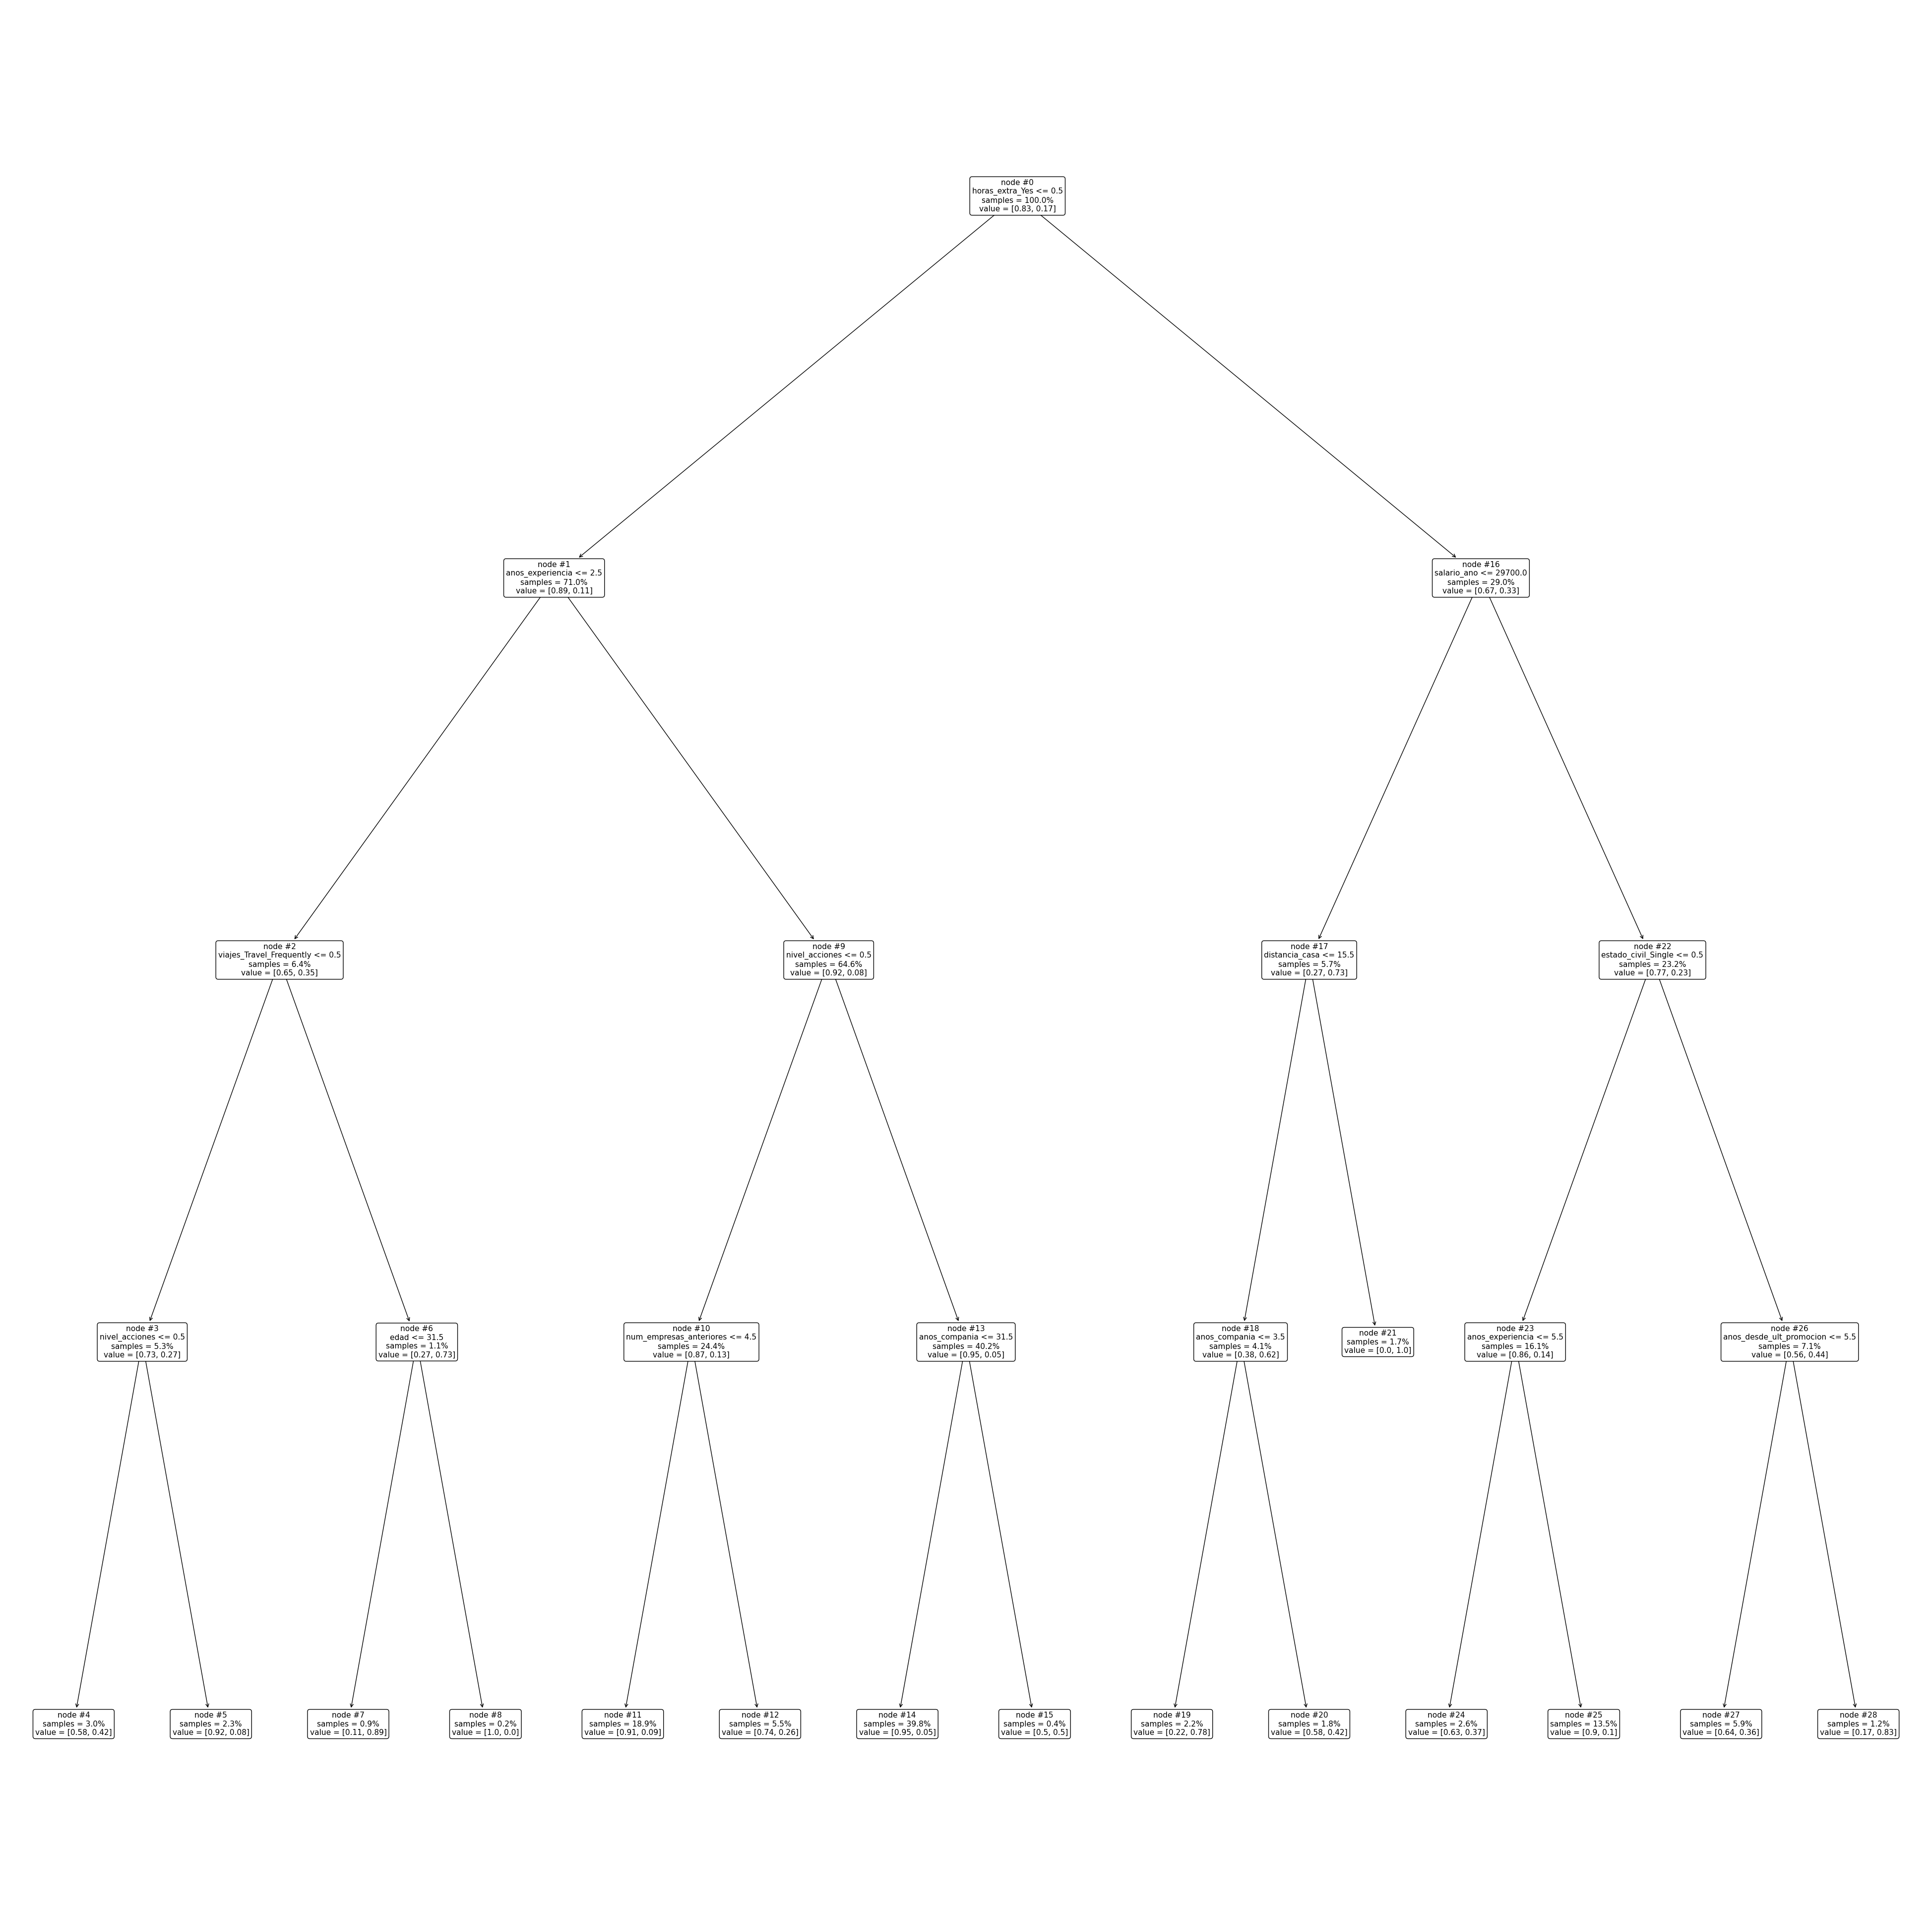

In [ ]:
#Diagramamos el arbol de decision
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(ac, feature_names=x.columns, impurity= False, node_ids=True, proportion= True, rounded= True, precision=2)

<Axes: >

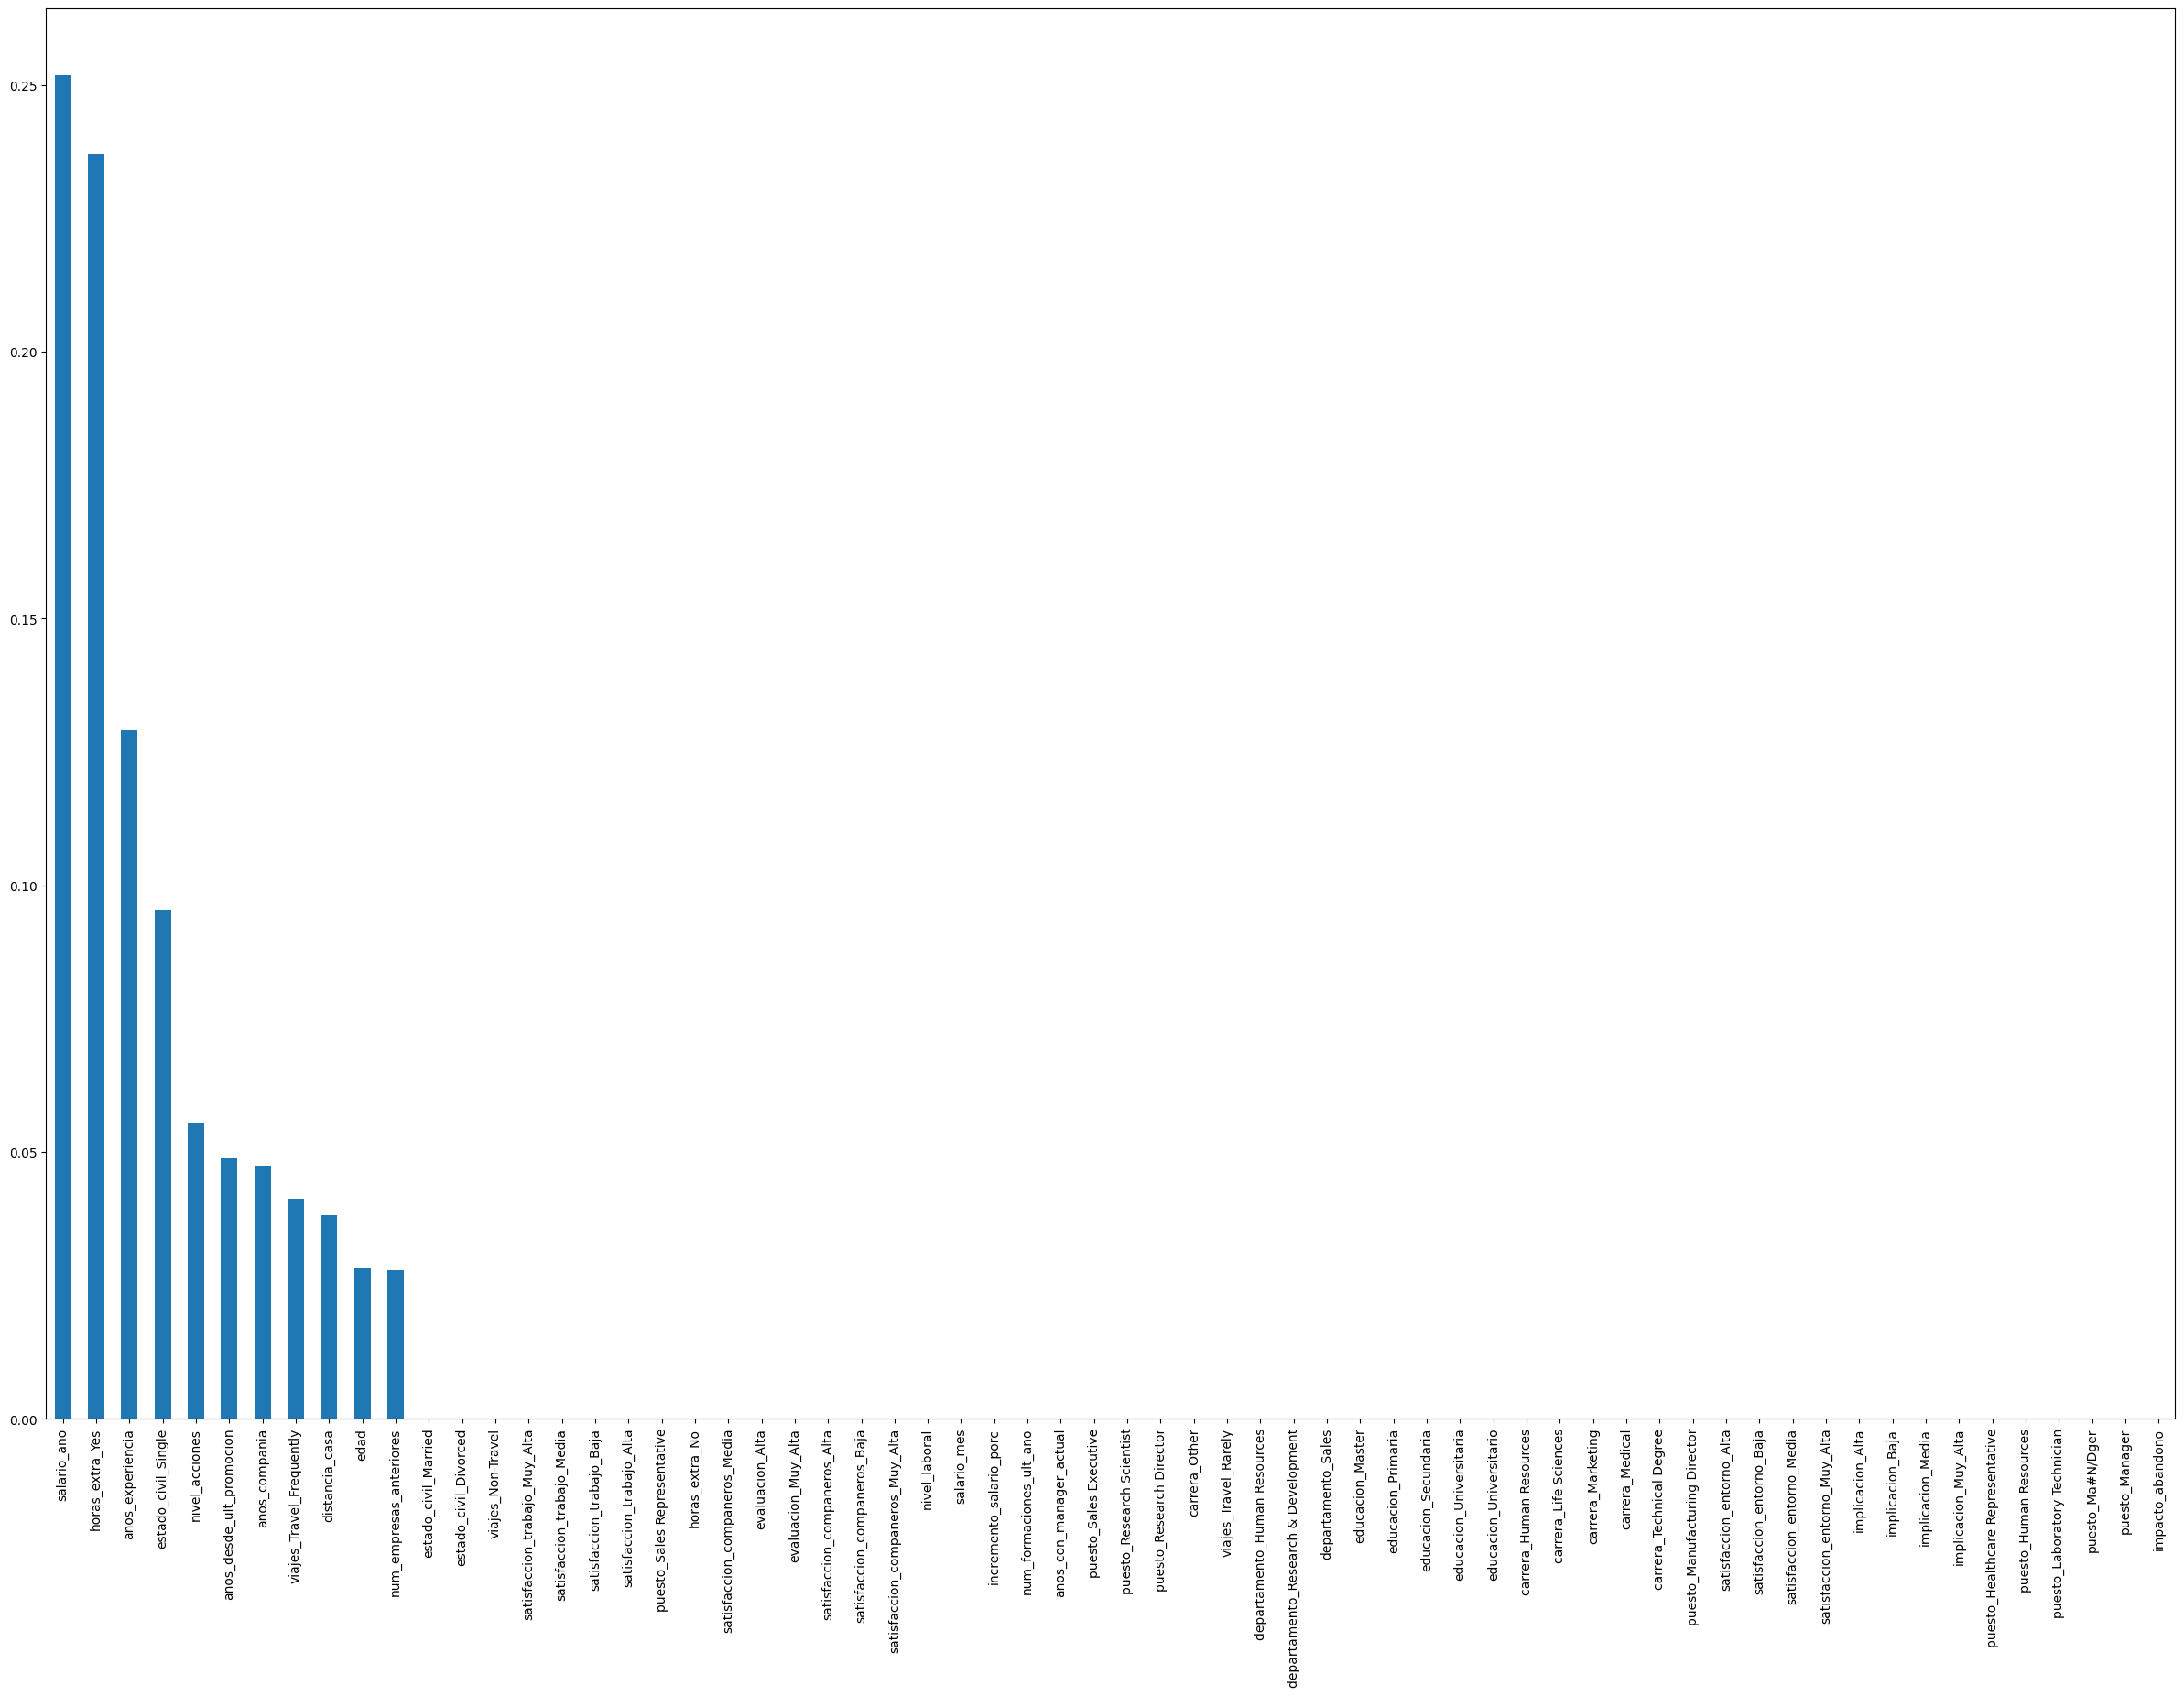

In [ ]:
#Importancia de las variables
pd.Series(ac.feature_importances_, index=x.columns).sort_values(ascending=False).plot(kind='bar', figsize=(30,20))

In [ ]:
#df['scoring_abandono']= ac.predict_proba(df_ml.drop(columns='abandono'))[:,1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.360656
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.046341
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.782609
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.100719
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.046341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.046341
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.046341
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.100719


In [ ]:
#Saber top de los empleados que se van de la compañia
df.sort_values(by='scoring_abandono', ascending=False).head(10)

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1905,34,1,Non-Travel,Research & Development,16,Primaria,Technical Degree,Muy_Alta,Baja,1,...,Media,1,5,2,5,3,0,27684,4457.124,1.0
1767,43,1,Travel_Frequently,Research & Development,17,Universitario,Technical Degree,Alta,Media,1,...,Muy_Alta,1,6,4,1,0,0,29244,4708.284,1.0
394,26,1,Travel_Rarely,Research & Development,16,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,5,2,3,0,2,28476,4584.636,1.0
952,25,1,Travel_Rarely,Sales,19,Secundaria,Marketing,Alta,Media,1,...,Alta,3,1,2,1,0,0,28956,4661.916,1.0
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,1.0
315,29,1,Travel_Rarely,Research & Development,18,Secundaria,Medical,Alta,Media,1,...,Alta,0,4,3,4,0,1,28668,4615.548,1.0
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,Media,0,6,4,4,0,3,24336,3918.096,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0


In [ ]:
#Exportamos a un excel, para graficar en Power Bi
#df.to_excel('Abandono_con_scoring.xlsx')

from google.colab import files
#Opcional df.to_excel('Abandono_con_scoring.xlsx')
files.download('Abandono_con_scoring.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>